### Import Libraries

In [1]:
import numpy as np
import pandas as pd
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt
from matplotlib.pyplot import imshow
import tensorflow as tf
from tensorflow import keras

from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications import ResNet50
 
from tensorflow.keras import models
from tensorflow.keras import layers
from tensorflow.keras import optimizers
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint
from tensorflow.keras.models import load_model

In [2]:
train_dir = r'C:\Users\Dennis\Desktop\DL0320EN\train'
validation_dir = r'C:\Users\Dennis\Desktop\DL0320EN\valid'
test_dir =r'C:\Users\Dennis\Desktop\DL0320EN\test'

In [3]:
cl = ['5', '10', '20', '50', '100', '200', '500']

In [6]:
# Generating batches of tensor image data
train_datagen = ImageDataGenerator(rescale=1./255)
valid_datagen = ImageDataGenerator(rescale=1./255)


train_generator = train_datagen.flow_from_directory(
        train_dir,
        target_size=(224, 224),
        batch_size=5,
        class_mode='categorical',
        classes = cl,
        seed = 0
        )

validation_generator = valid_datagen.flow_from_directory(
        validation_dir,
        target_size=(224, 224),
        batch_size=5,
        class_mode='categorical',
        classes = cl,
        seed = 0
        )




Found 70 images belonging to 7 classes.
Found 70 images belonging to 7 classes.


In [5]:
conv_base = ResNet50(weights='imagenet',
                     include_top=False,
                     input_shape=(224, 224, 3))

In [6]:
conv_base.summary()

Model: "resnet50"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 224, 224, 3) 0                                            
__________________________________________________________________________________________________
conv1_pad (ZeroPadding2D)       (None, 230, 230, 3)  0           input_1[0][0]                    
__________________________________________________________________________________________________
conv1_conv (Conv2D)             (None, 112, 112, 64) 9472        conv1_pad[0][0]                  
__________________________________________________________________________________________________
conv1_bn (BatchNormalization)   (None, 112, 112, 64) 256         conv1_conv[0][0]                 
___________________________________________________________________________________________

In [7]:
conv_base.trainable = False

In [8]:
model = models.Sequential()
model.add(conv_base)
model.add(layers.Flatten())
model.add(layers.Dense(7,activation='softmax'))

In [9]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
resnet50 (Model)             (None, 7, 7, 2048)        23587712  
_________________________________________________________________
flatten (Flatten)            (None, 100352)            0         
_________________________________________________________________
dense (Dense)                (None, 7)                 702471    
Total params: 24,290,183
Trainable params: 702,471
Non-trainable params: 23,587,712
_________________________________________________________________


In [10]:
model.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])

In [11]:
checkpoint = ModelCheckpoint("resnet50.h5",monitor='val_loss',verbose=1,save_best_only=True)

In [12]:
early = EarlyStopping(monitor='val_loss',min_delta=0,patience=3,verbose=1)

In [13]:
history = model.fit_generator(generator=train_generator,steps_per_epoch=5,epochs=20,verbose=1,
                             validation_data=validation_generator,validation_steps=5,callbacks=[checkpoint,early])

Epoch 1/20
4/5 [=======================>......] - ETA: 6s - loss: 5.1361 - accuracy: 0.5000   
Epoch 00001: val_loss improved from inf to 8.34461, saving model to resnet50.h5
5/5 [==============================] - 42s 8s/step - loss: 5.3983 - accuracy: 0.5200 - val_loss: 8.3446 - val_accuracy: 0.0400
Epoch 2/20
4/5 [=======================>......] - ETA: 6s - loss: 6.3249 - accuracy: 0.6000 
Epoch 00002: val_loss did not improve from 8.34461
5/5 [==============================] - 38s 8s/step - loss: 5.0599 - accuracy: 0.6800 - val_loss: 9.3068 - val_accuracy: 0.0400
Epoch 3/20
4/5 [=======================>......] - ETA: 5s - loss: 4.8357 - accuracy: 0.7000 
Epoch 00003: val_loss did not improve from 8.34461
5/5 [==============================] - 36s 7s/step - loss: 5.1580 - accuracy: 0.6800 - val_loss: 9.8723 - val_accuracy: 0.0400
Epoch 4/20
4/5 [=======================>......] - ETA: 5s - loss: 2.4177 - accuracy: 0.8500 
Epoch 00004: val_loss did not improve from 8.34461
5/5 [=======

In [14]:
train_history = model.history.history
train_history

{'loss': [5.398307466506958,
  5.0599006652832035,
  5.157989239599556,
  2.5788952112197876],
 'accuracy': [0.52, 0.68, 0.68, 0.84],
 'val_loss': [8.344606590270995,
  9.306798934936523,
  9.872286987304687,
  9.815646362304687],
 'val_accuracy': [0.04, 0.04, 0.04, 0.04]}

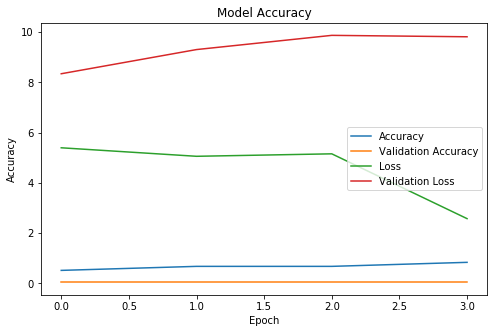

In [15]:
#Plot Graph to see the result
plt.figure(figsize=(8,5))
plt.plot(history.history["accuracy"])
plt.plot(history.history['val_accuracy'])
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title("Model Accuracy")
plt.ylabel("Accuracy")
plt.xlabel("Epoch")
plt.legend(["Accuracy","Validation Accuracy","Loss","Validation Loss"])
plt.show()

In [16]:
#Save the model
#model.save('resnet50.h5')

### Model Evaluation

In [12]:
test_datagen = ImageDataGenerator(rescale=1./255)

test_generator = test_datagen.flow_from_directory(
        test_dir,
        target_size=(224, 224),
        batch_size=5,
        class_mode='categorical',
        classes = cl,
        seed = 0,
        shuffle=False)

Found 70 images belonging to 7 classes.


In [18]:
len(test_generator)

14

In [19]:
resnet = model

In [20]:
resnetscore = resnet.evaluate_generator(test_generator,steps=14,verbose=1)

14/14 [==============================] - 20s 1s/step - loss: 8.2886 - accuracy: 0.1429


In [21]:
resnetscore

[8.288582754986626, 0.14285715]

In [22]:
resnet.metrics_names

['loss', 'accuracy']

In [23]:
print("Accuracy for Resnet50 is %.2f%%" % (resnetscore[1]*100))

Accuracy for Resnet50 is 14.29%


### Make predictions

Create a test dataset using validation data. Plot 5 random images which index is in the <code>numbers</code> list. Also print the predicted label and print a string indicate whether it has been correctly classified or mis-classified.<br> 
<p>Steps:</p>
<ol>
    <li>Use <code>MODEL.predict_generator()</code> to do the prediction</li>
    <li>Use <code>np.argmax()</code> to find the location of the maximum value</li>
    <li>Get the class labels from <code>train_generator</code> using <code>train_generator.filenames</code></li>
    <li>Get the class indices from the previous step using <code>train_generator.class_indices</code></li>
    <li>Match classes with labels like <code>[0, 1, 2, 3, 4, 5, 6] -> ['5', '10', '20', '50', '100', '200', '500']</code></li>
    <li>Get the true label by analysis folder name on the image resource path. Notice the <code>test_valid_genertor.filename</code> order is the same as the predicted order as you did not shuffle the dataset.</li>
    <li>Compare, plot and print the result</li>
</ol>

In [4]:
resnet = load_model("resnet50.h5")

In [13]:
resnet_predict = resnet.predict_generator(generator=test_generator,steps=14,verbose=1)

14/14 [==============================] - 20s 1s/step


In [14]:
#Probabilities for predictions
resnet_predict

array([[2.80221784e-03, 8.82964551e-01, 2.91552116e-08, 2.83083534e-09,
        1.11260876e-01, 1.05539733e-03, 1.91704126e-03],
       [3.12333042e-03, 8.46186578e-01, 1.83825275e-08, 1.78749848e-09,
        1.48077682e-01, 1.19059684e-03, 1.42184389e-03],
       [3.76621122e-03, 8.13159645e-01, 4.28449560e-08, 3.88602972e-09,
        1.78637251e-01, 2.24984717e-03, 2.18697032e-03],
       [3.46444291e-03, 8.12002897e-01, 2.61184923e-08, 2.48206722e-09,
        1.80632934e-01, 2.02117139e-03, 1.87852071e-03],
       [3.11176246e-03, 8.74060988e-01, 2.53031747e-08, 2.51042875e-09,
        1.19918525e-01, 1.16488384e-03, 1.74379675e-03],
       [2.40189489e-03, 8.64438951e-01, 1.50497765e-08, 1.54584701e-09,
        1.30208224e-01, 1.08101347e-03, 1.87004649e-03],
       [2.90273852e-03, 8.87032151e-01, 3.75293077e-08, 4.44674519e-09,
        1.06103420e-01, 1.53326499e-03, 2.42844620e-03],
       [3.82429315e-03, 8.50699663e-01, 4.04522922e-08, 5.12838527e-09,
        1.41830266e-01, 1

In [15]:
# A much better approach here would be to use argmax (arguments of the maxima)
# Argmax indicates the position of the highest argument row-wise or column-wise
# In our case, we want ot know which COLUMN has the higher argument (probability), 
# therefore we set axis=1 (for columns)
# The output would be the column ID with the highest argument for each observation (row)

np.argmax(resnet_predict,axis=1)

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1], dtype=int64)

In [7]:
class_labels = train_generator.filenames
class_labels

['5\\0.jpeg',
 '5\\1.jpeg',
 '5\\2.jpeg',
 '5\\3.jpeg',
 '5\\4.jpeg',
 '5\\5.jpeg',
 '5\\6.jpeg',
 '5\\7.jpeg',
 '5\\8.jpeg',
 '5\\9.jpeg',
 '10\\10.jpeg',
 '10\\11.jpeg',
 '10\\12.jpeg',
 '10\\13.jpeg',
 '10\\14.jpeg',
 '10\\15.jpeg',
 '10\\16.jpeg',
 '10\\17.jpeg',
 '10\\18.jpeg',
 '10\\19.jpeg',
 '20\\20.jpeg',
 '20\\21.jpeg',
 '20\\22.jpeg',
 '20\\23.jpeg',
 '20\\24.jpeg',
 '20\\25.jpeg',
 '20\\26.jpeg',
 '20\\27.jpeg',
 '20\\28.jpeg',
 '20\\29.jpeg',
 '50\\30.jpeg',
 '50\\31.jpeg',
 '50\\32.jpeg',
 '50\\33.jpeg',
 '50\\34.jpeg',
 '50\\35.jpeg',
 '50\\36.jpeg',
 '50\\37.jpeg',
 '50\\38.jpeg',
 '50\\39.jpeg',
 '100\\40.jpeg',
 '100\\41.jpeg',
 '100\\42.jpeg',
 '100\\43.jpeg',
 '100\\44.jpeg',
 '100\\45.jpeg',
 '100\\46.jpeg',
 '100\\47.jpeg',
 '100\\48.jpeg',
 '100\\49.jpeg',
 '200\\50.jpeg',
 '200\\51.jpeg',
 '200\\52.jpeg',
 '200\\53.jpeg',
 '200\\54.jpeg',
 '200\\55.jpeg',
 '200\\56.jpeg',
 '200\\57.jpeg',
 '200\\58.jpeg',
 '200\\59.jpeg',
 '500\\60.jpeg',
 '500\\61.jpeg',
 '500\

In [8]:
class_indices = train_generator.class_indices
class_indices

{'5': 0, '10': 1, '20': 2, '50': 3, '100': 4, '200': 5, '500': 6}

In [9]:
results = pd.DataFrame({"file": class_labels})

In [10]:
results

,file
0,5\0.jpeg
1,5\1.jpeg
2,5\2.jpeg
3,5\3.jpeg
4,5\4.jpeg
...,...
65,500\65.jpeg
66,500\66.jpeg
67,500\67.jpeg
68,500\68.jpeg


In [11]:
#Save to csv
results.to_csv("result.csv", index=False)

In [16]:
pred = np.argmax(resnet_predict,axis=1)
pred

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1], dtype=int64)

In [17]:
pred_df = pd.DataFrame(data=pred,columns=['Prediction'])

In [18]:
pred_df

,Prediction
0,1
1,1
2,1
3,1
4,1
...,...
65,1
66,1
67,1
68,1


### Thank you for completing this lab!

This notebook was created by Alex Aklson.

This notebook is part of a course on **Coursera** called *AI Capstone Project with Deep Learning*. If you accessed this notebook outside the course, you can take this course online by clicking [here](https://cocl.us/DL0321EN_Coursera_Week4_LAB1).

<hr>

Copyright &copy; 2020 [IBM Developer Skills Network](https://cognitiveclass.ai/?utm_source=bducopyrightlink&utm_medium=dswb&utm_campaign=bdu). This notebook and its source code are released under the terms of the [MIT License](https://bigdatauniversity.com/mit-license/).